# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd 

df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

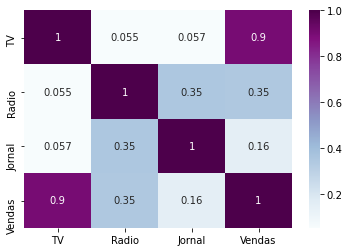

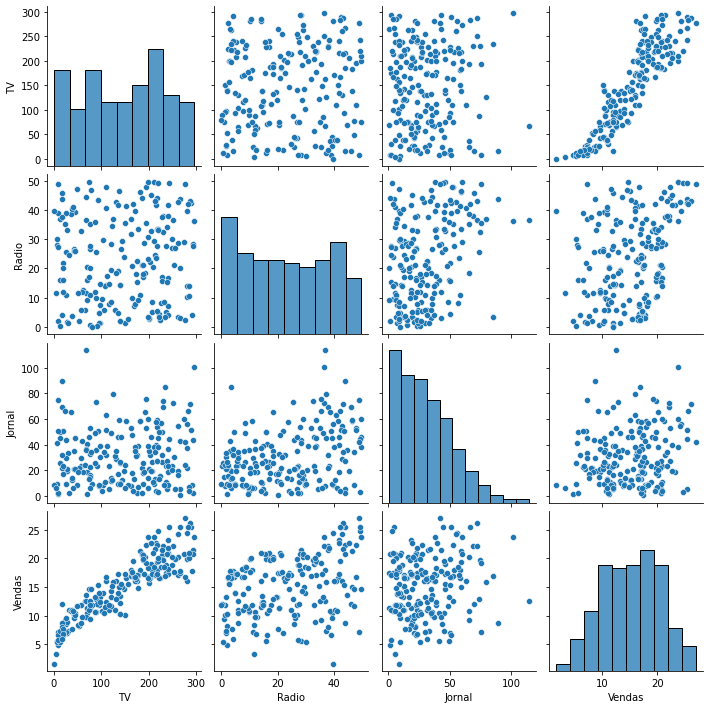

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.show()

sns.pairplot(df)    
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [10]:
from sklearn.model_selection import train_test_split

y = df["Vendas"]
x = df.drop("Vendas", axis=1)

# x_treino e y_treino --> Utilizados para que o algoritmo aprenda
# x_teste e y_teste --> Utilizados para ver se o algoritmo aprendeu
# A ordem importa no comando abaixo
# random_state --> Pega dados de forma aleatória, mas sempre da mesma forma aleatória
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão (Queremos prever algo) - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cria as I.A's 
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treina as I.A's 
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [12]:
from sklearn import metrics

# Cria as previsões
prev_regressaolinear = modelo_regressaolinear.predict(x_teste)
prev_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Comparar modelos
print(metrics.r2_score(y_teste, prev_regressaolinear))
print(metrics.r2_score(y_teste, prev_arvoredecisao))

0.9071151423684274
0.9638664201745644


#### Visualização Gráfica das Previsões

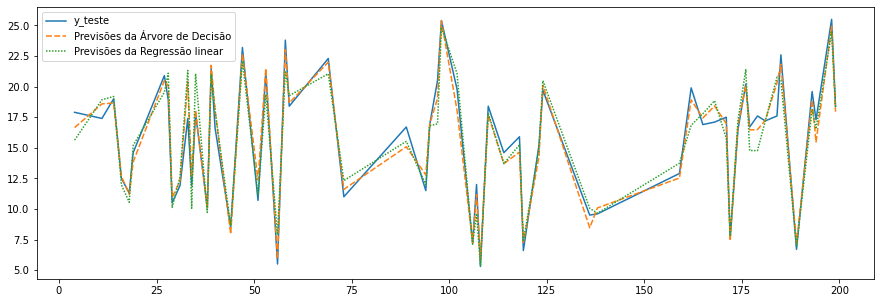

In [14]:
df_aux = pd.DataFrame()
df_aux["y_teste"] = y_teste
df_aux["Previsões da Árvore de Decisão"] = prev_arvoredecisao
df_aux["Previsões da Regressão linear"] = prev_regressaolinear

plt.figure(figsize=(15,5))
sns.lineplot(data=df_aux)
plt.show()

#### Qual a importância de cada variável para as vendas?

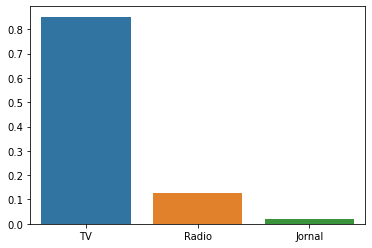

In [15]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

#### Quais os resultados obtidos?

Com base nas informações supracitadas, percebe-se que o investimento em "TV" deverá ser maior do que nos demais meios de comunicação, já que sua correlação com as vendas é maior.